In [1]:
pip install jovian --upgrade


The following command must be run outside of the IPython shell:

    $ pip install jovian --upgrade

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
import numpy as np
import torch
from torchvision.datasets import MNIST

In [5]:
dataset = MNIST(root = '/data', download = True)

 99%|██████████████████████████████████████████████████████████████████▎| 9805824/9912422 [00:13<00:00, 2842206.12it/s]

Extracting /data\MNIST\raw\train-images-idx3-ubyte.gz



0it [00:00, ?it/s]
  0%|                                                                                        | 0/28881 [00:03<?, ?it/s]
32768it [00:03, 10038.32it/s]                                                                                          

Extracting /data\MNIST\raw\train-labels-idx1-ubyte.gz



0it [00:00, ?it/s]
 96%|████████████████████████████████████████████████████████████████▏  | 1581056/1648877 [00:01<00:00, 1443836.63it/s]
1654784it [00:01, 1242311.86it/s]                                                                                      

Extracting /data\MNIST\raw\t10k-images-idx3-ubyte.gz



0it [00:00, ?it/s]
  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]
8192it [00:00, 48533.72it/s]                                                                                           

Extracting /data\MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [6]:
len(dataset)

60000

9920512it [00:30, 2842206.12it/s]                                                                                      

In [7]:
test_data = MNIST(root = '/data', train = False)
len(test_data)

10000

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


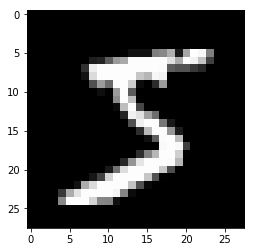

In [9]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

Label: 3


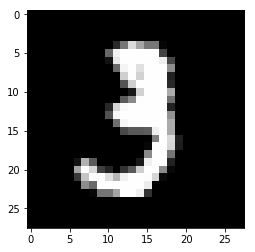

In [11]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

## Converting images into tensors

In [12]:
#To convert images into tensors
import torchvision.transforms as transforms

In [13]:
#Dataset after converting into tensors
dataset = MNIST(root = '/data',
               train = True,
               transform = transforms.ToTensor())

In [16]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [17]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


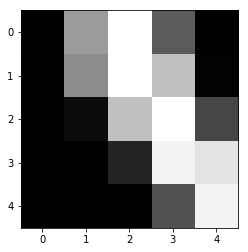

In [21]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap = 'gray');

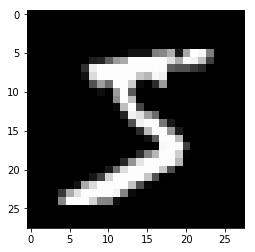

In [23]:
plt.imshow(img_tensor[0], cmap = 'gray');

## Training and validation sets

In [24]:
import numpy as np


def split_indices(n, val_pct):
    
    '''
    Shuffles the array indices 0, 1, ... , n-1 and seperates out a random portion for
    the validation set. np.random.permutation() is used for this purpose.
    '''
    
    #Determine size of validation set
    n_val = int(val_pct * n)
    
    #Create random permutations of 0 to n-1
    idxs = np.random.permutation(n)
    
    #Pick first n_val for validation set
    return idxs[n_val:], idxs[:n_val]

In [25]:
train_idxs, validation_idxs = split_indices(len(dataset), 0.2)

In [27]:
print(len(train_idxs), len(validation_idxs))

48000 12000


In [28]:
#Create PyTorch data loaders for each of the training and validation indices
#USe SubsetRandomSampler(), which samples elements randomly from a given list of indices
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [29]:
batch_size = 100

#Train sampler and data loader
train_sampler = SubsetRandomSampler(train_idxs)
train_loader = DataLoader(dataset, 
                         batch_size,
                         sampler = train_sampler)

#Validation sampler and data loader
val_sampler = SubsetRandomSampler(validation_idxs)
val_loader = DataLoader(dataset,
                       batch_size,
                       sampler = val_sampler)

## Model

In [30]:
import torch.nn as nn

In [31]:
input_size = 28*28
num_classes = 10

In [34]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [35]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0277, -0.0285, -0.0234,  ..., -0.0057, -0.0068,  0.0133],
         [ 0.0192, -0.0285,  0.0018,  ..., -0.0032,  0.0338,  0.0312],
         [ 0.0351,  0.0036, -0.0296,  ..., -0.0010,  0.0114,  0.0207],
         ...,
         [-0.0330,  0.0329, -0.0299,  ..., -0.0054, -0.0304,  0.0237],
         [-0.0041,  0.0107,  0.0047,  ...,  0.0133,  0.0075,  0.0129],
         [-0.0163, -0.0014,  0.0063,  ...,  0.0204,  0.0226, -0.0175]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0023, -0.0338,  0.0324,  0.0247, -0.0098, -0.0232, -0.0118,  0.0108,
         -0.0278,  0.0296], requires_grad=True)]

In [36]:
for images, labels in train_loader:
    outputs = model(images)
    break
    
print('Output shape:', outputs.shape)
print('Sample outputs:\n', outputs[:2].data)

Output shape: torch.Size([100, 10])
Sample outputs:
 tensor([[ 0.4290,  0.0949, -0.0632,  0.4028,  0.0536, -0.1447, -0.0879, -0.1855,
         -0.0655,  0.1335],
        [ 0.2832, -0.1295,  0.0617,  0.0972,  0.0937, -0.0015, -0.1367, -0.0895,
          0.0239,  0.1228]])


In [39]:
#Applying the activation function to convert the logit scores to probabilities
import torch.nn.functional as F

In [42]:
#Apply softmax to each output row
probs = F.softmax(outputs, dim=1)

print('Sample probabilities:', probs[:2].data)
print('Sum of probabilities:', torch.sum(probs[0]).item())

Sample probabilities: tensor([[0.1420, 0.1017, 0.0868, 0.1383, 0.0975, 0.0800, 0.0847, 0.0768, 0.0866,
         0.1057],
        [0.1275, 0.0844, 0.1022, 0.1059, 0.1055, 0.0959, 0.0838, 0.0878, 0.0984,
         0.1086]])
Sum of probabilities: 1.0


In [46]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([0, 0, 3, 0, 0, 2, 0, 0, 5, 8, 2, 5, 2, 1, 3, 2, 3, 2, 6, 2, 0, 8, 3, 5,
        3, 2, 2, 0, 0, 0, 2, 0, 3, 6, 5, 3, 6, 3, 3, 2, 2, 2, 6, 2, 0, 9, 4, 2,
        2, 2, 2, 3, 3, 3, 3, 8, 8, 3, 2, 0, 4, 2, 3, 2, 9, 2, 2, 6, 3, 3, 2, 3,
        3, 2, 3, 3, 2, 8, 6, 8, 3, 3, 3, 0, 2, 3, 4, 0, 8, 8, 3, 4, 2, 2, 3, 2,
        2, 3, 2, 3])
tensor([0.1420, 0.1275, 0.1398, 0.1447, 0.1527, 0.1347, 0.1204, 0.1285, 0.1297,
        0.1234, 0.1315, 0.1167, 0.1232, 0.1259, 0.1291, 0.1158, 0.1262, 0.1375,
        0.1277, 0.1394, 0.1286, 0.1212, 0.1322, 0.1174, 0.1258, 0.1847, 0.1322,
        0.1387, 0.1308, 0.1307, 0.1232, 0.1446, 0.1275, 0.1371, 0.1228, 0.1307,
        0.1211, 0.1351, 0.1302, 0.1278, 0.1376, 0.1193, 0.1214, 0.1124, 0.1335,
        0.1303, 0.1152, 0.1247, 0.1324, 0.1364, 0.1328, 0.1382, 0.1228, 0.1356,
        0.1129, 0.1259, 0.1335, 0.1205, 0.1282, 0.1169, 0.1171, 0.1360, 0.1111,
        0.1229, 0.1126, 0.1438, 0.1407, 0.1152, 0.1368, 0.1292, 0.1213, 0.1309,
        0.1198, 0.1

In [48]:
labels

tensor([0, 2, 9, 4, 4, 7, 5, 0, 4, 9, 1, 5, 2, 5, 1, 3, 9, 2, 5, 1, 0, 8, 1, 1,
        3, 2, 6, 4, 0, 2, 1, 2, 5, 6, 5, 3, 0, 5, 4, 2, 6, 3, 7, 3, 0, 1, 4, 9,
        1, 2, 1, 7, 3, 9, 0, 3, 2, 9, 2, 3, 9, 5, 3, 6, 3, 9, 2, 4, 8, 9, 7, 4,
        9, 2, 7, 9, 1, 8, 6, 8, 0, 7, 5, 6, 9, 8, 7, 6, 7, 5, 9, 8, 7, 7, 0, 4,
        0, 3, 7, 8])

Predicted labels do not match with actual labels. This is because we started with randomly initialized weights and biases. We need to train the model and adjust the weights

## Evaluation metric and loss function

In [49]:
def accuracy(preds, target):
    return torch.sum(preds == target).item() / len(preds)

In [50]:
accuracy(preds, label)

0.04

### Cross Entropy 

In [51]:
loss_fn = F.cross_entropy

In [55]:
#Loss for the current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2940, grad_fn=<NllLossBackward>)


### Optimizer

In [57]:
lr = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [58]:
def loss_batch(model, loss_fn, xb, yb, opt = None, metric = None):
    #Calculate loss
    preds = model(xb)
    loss = loss_fn(preds, yb)
    
    if opt is not None:
        #Compute gradients
        loss.backward()
        
        #Update parameters
        opt.step()
        
        #Reset gradients
        opt.zero_grad()
        
    metric_res = None
    if metric is not None:
        metric_res = metric(preds, yb)
        
    return loss.item(), len(xb), metric_res

In [60]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [70]:
def evaluate(model, loss_fn, valid_dl, metric = None):
    with torch.no_grad():
        #Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=accuracy) for xb, yb in valid_dl]
        
        #Seperate losses, counts and metrics
        loss, nums, metrics = zip(*results)
        
        #Total size of the dataset
        total = np.sum(nums)
        
        #Avg loss across all batches
        avg_loss = np.sum(np.multiply(loss, nums)) / total
        
        avg_metric = None
        if metric is not None:
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
        
    return avg_loss, total, avg_metric

In [71]:
val_loss, total, val_metric = evaluate(model, loss_fn, val_loader, metric = accuracy)
print(val_loss, val_metric)

2.30521533091863 0.14716666666666667


In [75]:
def fit(epochs, model, loss_fn, opt, train_dl, val_dl, metric = None):
    for epoch in range(epochs):
        #Training
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt = optimizer, metric = accuracy)
            
        #Evaluation
        result = evaluate(model, loss_fn, val_dl, metric)
        val_loss, total, val_metric = result
        
        #Print progress of training
        if metric is None:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, val_loss))
        else:
            print('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}'.format(epoch+1, epochs, val_loss, val_metric))

In [73]:
#Redefine model and optimizer
model = MnistModel()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [78]:
fit(10, model, F.cross_entropy, optimizer, train_loader, val_loader, metric = accuracy)

Epoch [1/10], Loss: 0.4429, Accuracy: 0.89
Epoch [2/10], Loss: 0.4200, Accuracy: 0.89
Epoch [3/10], Loss: 0.4022, Accuracy: 0.90
Epoch [4/10], Loss: 0.3879, Accuracy: 0.90
Epoch [5/10], Loss: 0.3762, Accuracy: 0.90
Epoch [6/10], Loss: 0.3665, Accuracy: 0.90
Epoch [7/10], Loss: 0.3582, Accuracy: 0.90
Epoch [8/10], Loss: 0.3515, Accuracy: 0.90
Epoch [9/10], Loss: 0.3455, Accuracy: 0.91
Epoch [10/10], Loss: 0.3402, Accuracy: 0.91


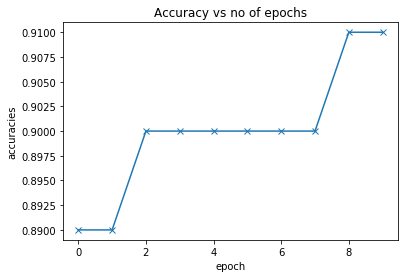

In [83]:
acc = [0.89, 0.89, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.91, 0.91]
plt.plot(acc, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('Accuracy vs no of epochs')
plt.show()

In [84]:
!pip install jovian --upgrade

  Running setup.py bdist_wheel for jovian: started
  Running setup.py bdist_wheel for jovian: finished with status 'done'
  Stored in directory: C:\Users\shash\AppData\Local\pip\Cache\wheels\67\9f\b0\b841f81da3f8c9919ed232fa14bba397c5c38fa8df5d125d8a
  Running setup.py bdist_wheel for uuid: started
  Running setup.py bdist_wheel for uuid: finished with status 'done'
  Stored in directory: C:\Users\shash\AppData\Local\pip\Cache\wheels\2a\80\9b\015026567c29fdffe31d91edbe7ba1b17728db79194fca1f21
Successfully built jovian uuid


In [85]:
lr

0.0001

In [87]:
import jovian

jovian.log_hyperparams({
    'opt':'Adam',
    'lr':'0.0001',
    'batch_size':100,
    'arch':'logistic-regression',
    'epochs':10
})

<IPython.core.display.Javascript object>

[jovian] Please enter your API key (from https://jvn.io ):
········
[jovian] Hypermaters logged.


In [88]:
jovian.log_metrics({
    'val_loss':0.3402,
    'val_acc':0.91
})

[jovian] Metrics logged.


In [90]:
#Define test dataset
test = MNIST(root = '/data', train = False, transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 1


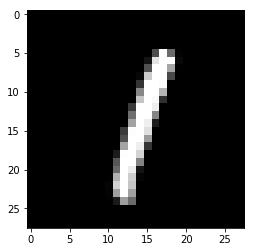

In [92]:
img, label = test[5]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [95]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [96]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 0 Prediction: 0


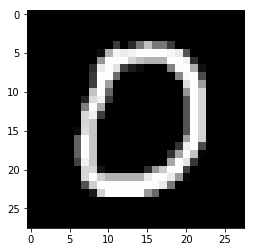

In [97]:
img, label = test[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Prediction:', predict_image(img, model))

Label: 1 Prediction: 1


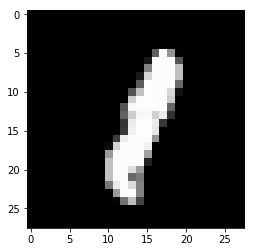

In [98]:
img, label = test[190]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Prediction:', predict_image(img, model))

Label: 0 Prediction: 0


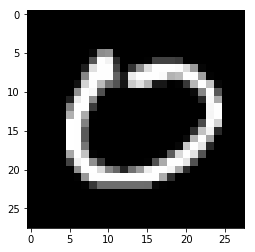

In [99]:
img, label = test[297]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Prediction:', predict_image(img, model))

Label: 5 Prediction: 5


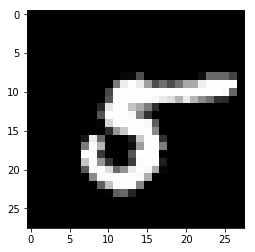

In [102]:
img, label = test[9998]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Prediction:', predict_image(img, model))

Check overall model accuracy and loss on test set

In [103]:
test_loader = DataLoader(test, batch_size=200)

test_loss, total, test_metric = evaluate(model, F.cross_entropy, test_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.2f}'.format(test_loss, test_metric))

Loss: 0.3206, Accuracy: 0.91


In [104]:
jovian.log_metrics({
    'test_loss':0.3206,
    'test_acc':0.91
})

[jovian] Metrics logged.


## Saving and loading the model

In [105]:
torch.save(model.state_dict(), 'mnist-logistic-adam.pth')

In [106]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0233,  0.0327, -0.0110,  ...,  0.0270, -0.0308,  0.0257],
                      [ 0.0207,  0.0010,  0.0240,  ...,  0.0158,  0.0227, -0.0304],
                      [-0.0076,  0.0144, -0.0279,  ..., -0.0212, -0.0275, -0.0070],
                      ...,
                      [-0.0113, -0.0162,  0.0027,  ...,  0.0112, -0.0334,  0.0353],
                      [-0.0269,  0.0125,  0.0082,  ...,  0.0114,  0.0047,  0.0018],
                      [-0.0099, -0.0049,  0.0233,  ..., -0.0201, -0.0279, -0.0109]])),
             ('linear.bias',
              tensor([-0.1005,  0.2058, -0.0453, -0.1066,  0.0892,  0.1536, -0.0183,  0.1053,
                      -0.2485, -0.0549]))])

In [107]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic-adam.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0233,  0.0327, -0.0110,  ...,  0.0270, -0.0308,  0.0257],
                      [ 0.0207,  0.0010,  0.0240,  ...,  0.0158,  0.0227, -0.0304],
                      [-0.0076,  0.0144, -0.0279,  ..., -0.0212, -0.0275, -0.0070],
                      ...,
                      [-0.0113, -0.0162,  0.0027,  ...,  0.0112, -0.0334,  0.0353],
                      [-0.0269,  0.0125,  0.0082,  ...,  0.0114,  0.0047,  0.0018],
                      [-0.0099, -0.0049,  0.0233,  ..., -0.0201, -0.0279, -0.0109]])),
             ('linear.bias',
              tensor([-0.1005,  0.2058, -0.0453, -0.1066,  0.0892,  0.1536, -0.0183,  0.1053,
                      -0.2485, -0.0549]))])

In [108]:
test_loss, total, test_metric = evaluate(model2, F.cross_entropy, test_loader, metric = accuracy)
print('Loss: {:.4f}, Accuracy: {:.2f}'.format(test_loss, test_metric))

Loss: 0.3206, Accuracy: 0.91


## Commit and upload the notebook

In [109]:
jovian.commit(artifacts=['mnist-logistic-adam.pth'])

[jovian] Saving notebook..


<IPython.core.display.Javascript object>

[jovian] Creating a new notebook on https://jvn.io
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading artifacts..
[jovian] Recording metrics & hyperparameters..
[jovian] Committed successfully! https://jvn.io/shash2595/3163378d2f094969be83b37d4d961374
